# Interactive clustering example

Here we will use the new interactive tool for interactive clustering.

You can integrate this with your workflow to fix clustering issues. To illustrate, I've duplicated the first part of the analysis template here. We then correct a clustering issue with the interactive clustering tool, and pipe the droplets DataFrame back into the rest of the pipeline (not shown here). 

# Inputs

In [1]:
exp_date = '20211116_'
UV_bin = '_UV0'
outputfolder = exp_date+"output/" 
codefolder = "" 
datafolder = "images/" 

# Notes_path = codefolder+'Notes_20200408'+UV_bin+'.xlsx' 
Notes_path = codefolder+exp_date+'Notes'+UV_bin+'.xlsx' 
config_file = codefolder+exp_date+"config.yml"
droplets_csv = outputfolder+exp_date+'droplets_dye_correction.csv'
# droplets_csv = outputfolder+exp_date+'droplets_normalized.csv'

# Imports

In [2]:
# basic imports 
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Append top level directory with kchip package
import sys

# kchip imports
import kchip_py3.io as kchip_io
import kchip_py3.analyze as kchip_analyze

# Other
%matplotlib inline

# Read in config file
with open(config_file, 'r') as ymlfile:
    config = yaml.load(ymlfile)
    
config['path'] = Notes_path
print (yaml.dump(config))

barcodes:
  cluster:
    eps: 0.03
    min_samples: 2
    offset:
    - 0
    - 0
    - 0
    points_to_cluster: 40000
  path: 20201109_Notes_UV0.xlsx
image:
  background_image: background_image
  base_path: images/
  bkg_img_suffix: _bg
  bugs: 3
  dyes:
  - 0
  - 1
  - 2
  names:
    premerge: 20211116_premerge
    t0: 20211116_t0
    t1: 20211116_t1
    t2: 20211116_t2
    t3: 20211116_t3
  overlap: 0.05
  pixel_size: 6.5
  rescale:
  - 1.2
  - 1.0
  - 1.0
  - 1
  size: 2048
  well_start_image:
  - 1
  - 2
  well_start_xy:
  - 540
  - 140
path: 20211116_Notes_UV0.xlsx
well_mask:
  filename: kchip/well_mask.tif
  pixel_size: 8.33625
  well_start_xy:
  - 850
  - 522



/Users/gowtham/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/Users/gowtham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


# Plotting parameters

In [3]:
fontsize = 14
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False

plt.rcParams['axes.linewidth']=3
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['lines.linewidth']=2
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size']=fontsize
plt.rcParams['xtick.major.width']=1.5
plt.rcParams['ytick.major.width']=1.5
plt.rcParams['contour.negative_linestyle'] = 'solid'

plt.rcParams['savefig.bbox']='Tight'
plt.rcParams['pdf.fonttype'] = 42

# Load in droplets DataFrame

In [4]:
# Read in droplets file
droplets = pd.read_csv(droplets_csv,index_col=0)
# droplets = droplets[droplets['UV'] == 0]
config['barcodes']['path'] = Notes_path

In [5]:
droplets.head()

,IndexX,IndexY,ImageX,ImageY,Dye 0,Dye 1,Dye 2,Well_ID,Hash,Dye 1 corr,Dye 2 corr
0,1,1,807,1136,26026.752,2443.04,394.84,15.0,2528504235181315532,2435.1432,52.8144
1,1,1,486,998,4175.088,829.04,13059.60,1500.0,2528504234194519029,567.8480,12943.5344
2,1,1,1011,998,17774.400,1968.20,4764.44,1194.0,2528504233879955799,1872.9112,4488.8920
3,1,1,840,1016,5926.896,15843.04,1393.56,1501.0,2528504234195684078,15815.1688,-824.4656
4,1,1,1012,1018,19354.512,5311.20,2578.40,1194.0,2528504233879955799,5259.6320,1834.8320


# Initial Clustering

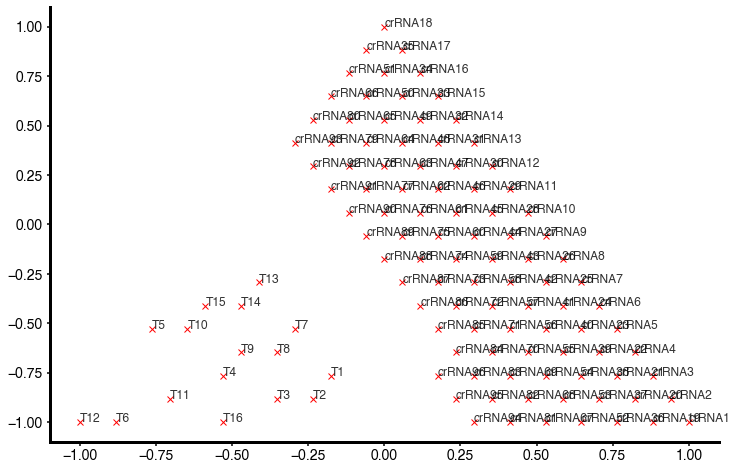

In [6]:
# Example clustering
kchip_analyze.cluster_ref(config)
plt.gcf().set_size_inches(12,8)
plt.savefig(outputfolder+exp_date+'cluster_reference.png',dpi=300)

/Users/gowtham/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/Users/gowtham/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


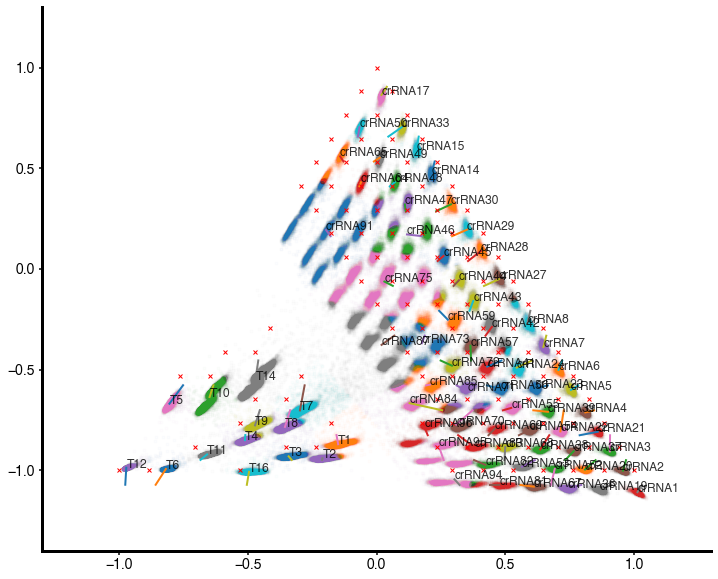

In [7]:
# Mess up clustering parameters to force bad clustering, for illustration
config['barcodes']['cluster']['eps'] = 0.015
config['barcodes']['cluster']['min_samples'] = 80
config['barcodes']['cluster']['points_to_cluster'] = 40000

fig, ax = plt.subplots()

# Identify the clusters (using DBSCAN)
droplets = kchip_analyze.identify_clusters(config,droplets,show=1,ax=ax)[0]

# Map the cluster centroids to labels
droplets = kchip_analyze.map_labels_to_clusters(config,droplets,show=2,ax=ax)[0]
plt.gca().set_xlim(-1.3,1.3)
plt.gca().set_ylim(-1.4, 1.3)
plt.gcf().set_size_inches(12,10)
plt.savefig(outputfolder+exp_date+'uncorrected_clusters'+UV_bin+'.png',dpi=300)

In [8]:
print('Cluster #',droplets.Cluster.unique().shape)

Cluster # (77,)


# Correct Clustering

In [9]:
# Import the interactive tools
import kchip_py3.tools.interact as interact

# Create InteractiveCluster object
centroids = droplets.groupby('Cluster')[['PlaneX','PlaneY']].median().values
rc = interact.InteractiveCluster(droplets[['PlaneX','PlaneY']].values[-5000:,:],centroids)

Don't forget to call `interact.bqplt.show()` in order to show the plot. You can now click on points to add a cluster, or click on the cluster centroid to remove the cluster. As you add and remove the points will re-cluster in response. 

In [10]:
# import bqplot as bqplt
# Show the plot
interact.bqplt.show()

# Change the point opacities for better viewing, as desired
rc.sca_points.default_opacities = [0.5]

After we are satisfied, we can then update the droplets DataFrame. 

In [11]:
# Update the droplets dataframe with new cluster assignments
droplets['Cluster']=rc.cluster(droplets[['PlaneX','PlaneY']].values)

Finally, remap the barcodes to the cluster centroids using `map_labels_to_clusters`.

/Users/gowtham/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/Users/gowtham/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


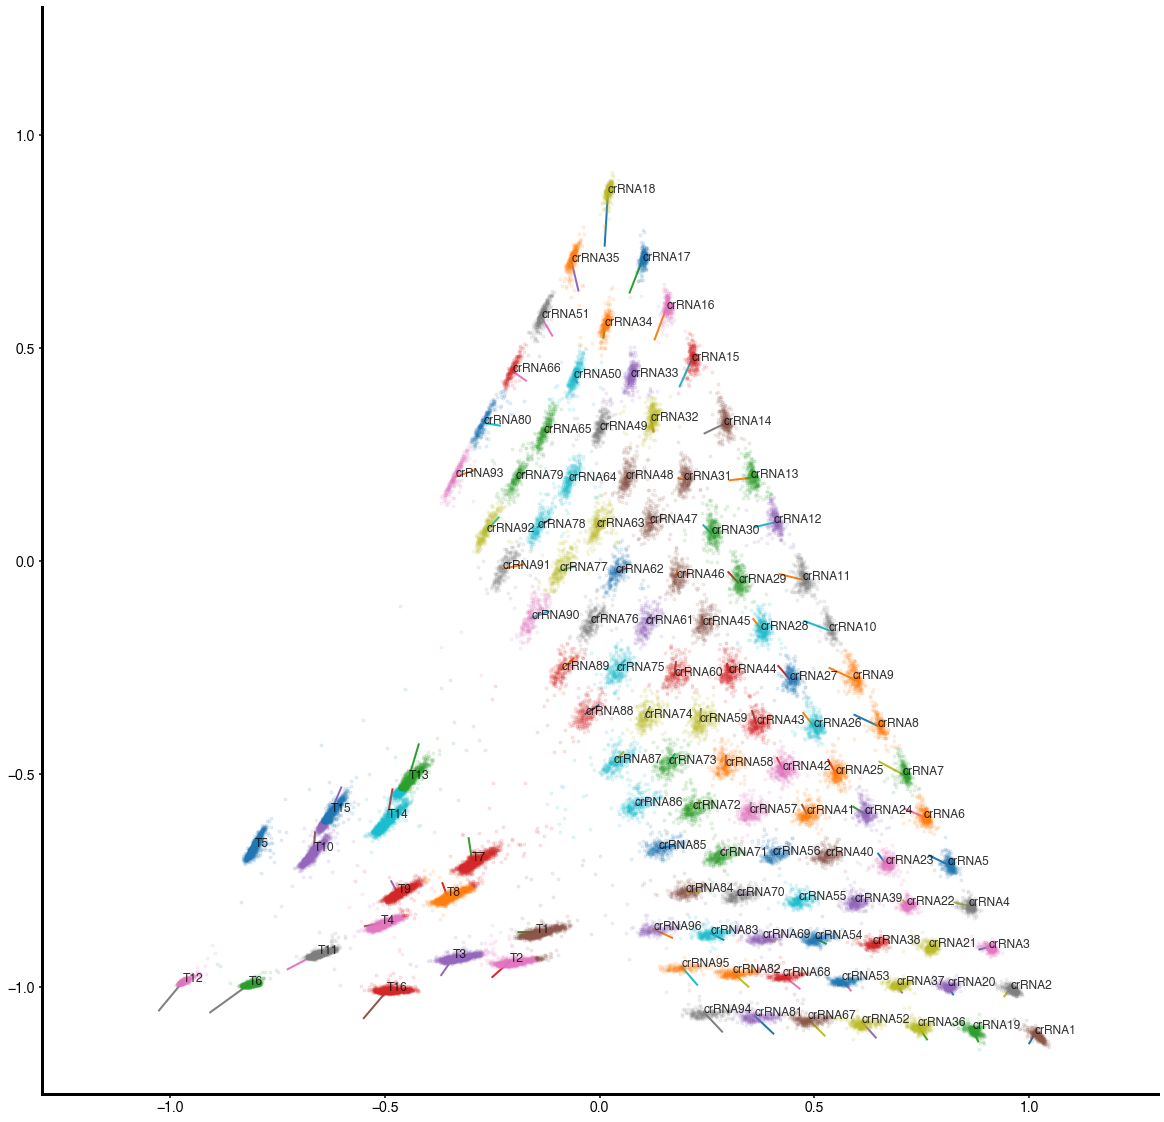

In [12]:
fig, ax = plt.subplots(figsize=(50,50))

# Use the updated cluster centroids from the interactive plot
droplets,_ = kchip_analyze.map_labels_to_clusters(config,droplets,show=1,ax=ax)
# Replot the points to view the clusters
d = droplets.loc[:50e3] # only choose the first 5000 points so we don't overload matplotlib

for item in droplets['Cluster'].unique():
    xy = d.query('Cluster=='+str(item))[['PlaneX','PlaneY']].values
    ax.plot(xy[:,0],xy[:,1],'.',alpha=0.1)
plt.gca().set_xlim(-1.3,1.3)
plt.gca().set_ylim(-1.25, 1.3)
plt.gcf().set_size_inches(20,20)
plt.savefig(outputfolder+exp_date+'clusters_corrected'+UV_bin+'.png',dpi=300\
            ,bbox_inches='tight')

# Save corrected clusters 

In [13]:
# Save as csv, reload that into analysis notebook!!!
droplets.to_csv(outputfolder+exp_date+'droplets_clustered_corrected'+UV_bin+'.csv')